## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merged_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [2]:
# Checking the number of mice in the DataFrame.
# print(merged_df.count)
merged_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_df = merged_df[merged_df.duplicated(subset=('Mouse ID', 'Timepoint'), keep='first')]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicated_df.index)

Int64Index([909, 911, 913, 915, 917], dtype='int64')


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_df = merged_df.drop([909, 911, 913, 915, 917])
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_df["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = drop_df.groupby(["Drug Regimen"])
volume_df = regimen_grouped["Tumor Volume (mm3)"]
summary_regimen_grouped = volume_df.describe()
# summary_regimen_grouped
mean = round(volume_df.mean(),2)
median = volume_df.median()
# variance = square of standard deviation
variance = summary_regimen_grouped["std"] * summary_regimen_grouped["std"]
st_deviation = volume_df.std() 
# SED = divide standard deviation by square root of count
sem = summary_regimen_grouped["std"] / (np.sqrt(summary_regimen_grouped["count"]))

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_frame = pd.DataFrame(mean)
data_frame.rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"}, inplace=True)
data_frame["Median"] = round(median,2)
data_frame["Variance"] = round(variance,2)
data_frame["Standard Deviation"] = round(st_deviation,2)
data_frame["SEM"] = round(sem,2)
data_frame
# This method produces everything in a single groupby function.

,Avg Tumor Volume (mm3),Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


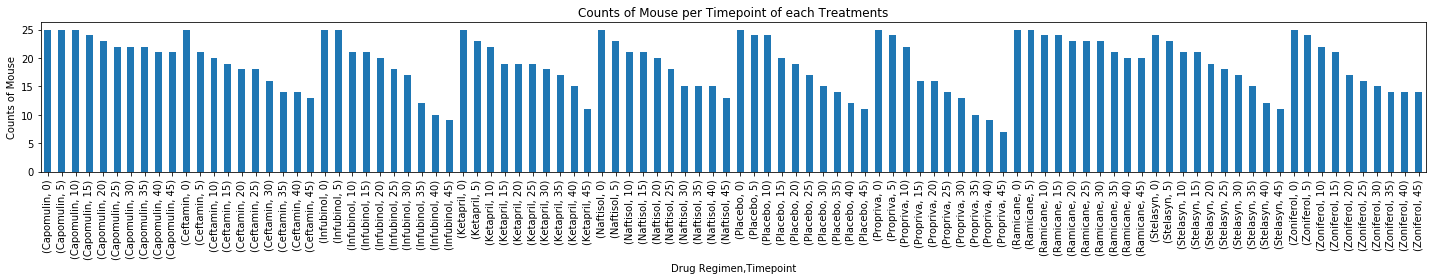

In [44]:
grouped_1 = drop_df.groupby(["Drug Regimen", "Timepoint"])
grouped_2 = grouped_1["Mouse ID"].count() 
grouped_2.plot(kind='bar', figsize=(20, 4))
plt.title("Counts of Mouse per Timepoint of each Treatments")
plt.ylabel("Counts of Mouse")
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [92]:
# df2 = drop_df[["Drug Regimen", "Timepoint", "Mouse ID"]]
# df2.set_index(["Drug Regimen", "Timepoint"], inplace=True)
# df3 = df2["Mouse ID"].value_counts()
# df4 = list(df2.index)
# # df4

# df2

In [91]:
# x_axis = df4

# y_axis = 
# plt.plot(x_axis, y_axis, color='red', alpha=0.5, align='center')

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
